# California Renewables Data

ER131: Data, Envinronment and Society.

In this notebook, we'll do a brief tour of the data set we'll be working with from the California Independent System Operator.

You'll also get a glimpse of what the functions in the `pandas` library can do.

In [1]:
import csv # this helps us work with csv files
import numpy as np # numpy is something like a matlab replacement for python.  Numeric and scientific computing.
import pandas as pd # we'll learn more about this soon

### Background
California ISO is the system operator for the California grid.  They tell generators when and how much to produce.  

They record renewable production data [here](http://content.caiso.com/green/renewrpt/)

That page links to files giving production for the *day* in question. 



### Data Provenance
What can be said about the data provenance?
* Collected with power meters on all generators connected to the grid
* How were the data manipulated?
    * Aggregated by hour and generator type
* What mechanism generated the data: experiment, industrial process, observations in nature? 
    * Industrial process 
* Is it a random sample, a census?
    * We have access to all recorded days, but not all days in the history of the world are recorded.  Administrative database.

### Let's dig in
Let's look at Aug 21, 2017, the day you'll explore in the HW

In [2]:
# figure out what the url should be and enter it here:
url = 'http://content.caiso.com/green/renewrpt/20170821_DailyRenewablesWatch.txt' # do this in lecture

`requests` is a super useful library you can use to scrape data from the web.

In [3]:
import requests # this is a really useful library for pulling data from the web

Let's "tab into" `requests` to see how we can get data from the url.

Some cool 'help' features of Jupyter
1. pushing tab at the right time shows you what methods are available to apply to an object.
2. pushing shift-tab repeatedly gives you help files 
3. typing a question mark before a command pulls up the full help file.  

In [4]:
?requests.get

In [5]:
caiso_data = requests.get(url) # do this in lecture

In [6]:
# let's see what we got
caiso_data

<Response [200]>

'Response' is the object returned by requests.  In this case we've opened a connection to the url but we haven't actually grabbed the text.  

Let's look at the requests documentation to figure out what to do.  (Search for python requests in your favorite search engine and see what you find.)

Looks like we can tack .text on the end of the object to actually pull the data.

In [7]:
caiso_data.text # do this in lecture

'08/21/17\t\t\tHourly Breakdown of Renewable Resources (MW)\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\tHour\t\tGEOTHERMAL\tBIOMASS\t\tBIOGAS\t\tSMALL HYDRO\tWIND TOTAL\tSOLAR PV\tSOLAR THERMAL\t\t\t\t\t\t\r\n\t1\t\t971\t\t245\t\t164\t\t406\t\t2032\t\t0\t\t0\t\t\r\n\t2\t\t971\t\t246\t\t174\t\t408\t\t2056\t\t0\t\t0\t\t\r\n\t3\t\t971\t\t248\t\t175\t\t406\t\t1912\t\t0\t\t0\t\t\r\n\t4\t\t972\t\t250\t\t175\t\t415\t\t1808\t\t0\t\t0\t\t\r\n\t5\t\t972\t\t251\t\t175\t\t405\t\t1771\t\t0\t\t0\t\t\r\n\t6\t\t973\t\t250\t\t175\t\t412\t\t1681\t\t0\t\t0\t\t\r\n\t7\t\t972\t\t254\t\t175\t\t441\t\t1560\t\t174\t\t0\t\t\r\n\t8\t\t971\t\t256\t\t174\t\t442\t\t1559\t\t2376\t\t0\t\t\r\n\t9\t\t969\t\t259\t\t174\t\t495\t\t1582\t\t5484\t\t86\t\t\r\n\t10\t\t965\t\t258\t\t169\t\t463\t\t1534\t\t5312\t\t141\t\t\r\n\t11\t\t945\t\t260\t\t172\t\t451\t\t1372\t\t3503\t\t110\t\t\r\n\t12\t\t939\t\t259\t\t176\t\t457\t\t1297\t\t6329\t\t201\t\t\r\n\t13\t\t936\t\t256\t\t176\t\t460\t\t1308\t\t8700\t\t472\t\t\r\n\t14\t\t936\t\t257\t\t176\t\

Ack!  That's pretty ugly!  What are we looking at?

<br>
<br>
<br>

(a tab delimited file)

I wrote a function that will pull a date range and massage it into the form we want:

In [8]:
import datetime # helps us to work with dates and times in different formats
import os # helps us talk to the operating system command line
def CAISOrenewables(year, month, start_day, end_day, production = False, matrix = False):
    """Scrape CAISO's daily renewable watch .txt files and 
    convert to a DataFrame or Numpy record array. Will only scrape
    a range of days in a given month.
    
    Keyword arguments:
    Year -- year of the date to scrape
    Month -- Month of date to scrape
    start_day -- starting day of month to scrape
    end_day -- ending day to scrape
    production -- If False, will collect hourly breakdown of renewable resources.
                  If True, will scrape hourly breakdown of total production by resource type.
    matrix -- If False, function will return a Pandas DataFrame
              If True, will return numpy recarray
    """
    base_url = 'http://content.caiso.com/green/renewrpt/'
    tail = '_DailyRenewablesWatch.txt'
    
    rv = pd.DataFrame()
    
    for day in range(start_day, end_day + 1):
        #format date and URL to pull
        if month < 10:
            str_month = '0' + str(month)
        else:
            str_month = str(month)
        if day < 10:
            str_day = '0'+ str(day)
        else:
            str_day = str(day)
            
        str_m_day = str_month + str_day
        url = base_url + str(year) + str_m_day + tail

        #Write scraped file to drive
        caiso_data = requests.get(url).text
        txt_filename = str(year) +str_m_day + '.txt'
        csv_filename = str(year) + str_m_day + '.csv'
    
        with open(txt_filename, 'w') as f:
            f.write(str(caiso_data))
    
        #Convert the .txt file to a csv.
        with open(txt_filename) as txtfile, open(csv_filename,'w') as new_csv:
            for line in txtfile: 
                new_csv.write(line.replace('\t',','))

        #Get day of year for dataframe index
        date = datetime.date(year, month, day)
    
        #Load data to dataframe.
        data = pd.read_csv(csv_filename, delimiter='\t')
        
        if not production:
            data = data.iloc[range(0, 25)]
        else:
            data = data.iloc[range(28, 53)].reset_index(drop=True)
    
        #Get column names
        columns = [i for i in np.array2string(data.iloc[0].values).split(',') if len(i)>3]
    
        #Grab first row of data to put in a dictionary then append the rest.
        first_row = [[int(i)] for i in np.array2string(data.iloc[1].values).split(',') if i.isdigit()]
        df_data = dict(zip(columns, first_row))
    
        #Do the same for the rest of the rows
        for row in range(2, data.shape[0]):
            vals = [int(i) for i in np.array2string(data.iloc[row].values).split(',') if i.isdigit()]
            for item in range(len(columns)):
                df_data[columns[item]].append(vals[item])
    
        #create DataFrame with collected data
        d_df = pd.DataFrame(df_data, [date]*24)[columns]
        rv = rv.append(d_df)
        
        os.remove(txt_filename)
        os.remove(csv_filename)
        
    if matrix:
        return rv.to_records(index=True)
    
    return rv

Ok, now we can pull whatever data we want for renewables production from the CAISO website.  

Here we'll pull CAISO renewables data for August 20 through 22, 2017.

In [9]:
caiso_data = CAISOrenewables(2017, 8, 20, 22) # do this in lecture

In [10]:
caiso_data # this shows the data frame

,Hour,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
2017-08-20,1,970,248,175,427,2792,0,0
2017-08-20,2,971,247,175,441,2717,0,0
2017-08-20,3,970,248,176,407,2487,0,0
2017-08-20,4,969,248,177,364,2166,0,0
2017-08-20,5,969,247,176,374,2079,0,0
...,...,...,...,...,...,...,...,...
2017-08-22,20,957,235,176,610,1666,167,0
2017-08-22,21,965,233,177,622,2017,19,0
2017-08-22,22,967,236,176,502,2096,21,0
2017-08-22,23,970,227,176,451,1903,0,0


Now let's use the `.loc` method in pandas to look at an individual data column (more on pandas next time)

In [38]:
caiso_data.loc[:,'SOLAR PV'] #do this in lecture

0       0
1       0
2       0
3       0
4       0
     ... 
67    167
68     19
69     21
70      0
71      0
Name: SOLAR PV, Length: 72, dtype: int64

In [39]:
import matplotlib.pyplot as plt # this gives us libraries to plot nice figures.

Let's plot the solar generation data using `plt.plot` and the `.loc` method

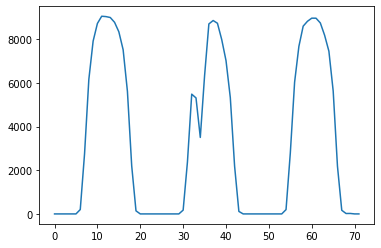

In [40]:
plt.plot(caiso_data.loc[:,'SOLAR PV']) # do this in lecture

The problem is that the "index" of the data frame is clustered at the same value for each day -- so the data get plotted just at one location for each day. 

In [41]:
caiso_data.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71],
           dtype='int64')

 Let's fix the index with a list comprehension. Replace the current indexes with [1, 2, 3, ...]

In [42]:
caiso_data.index = [i for i in range(0,len(caiso_data.index))] # do this in lecture

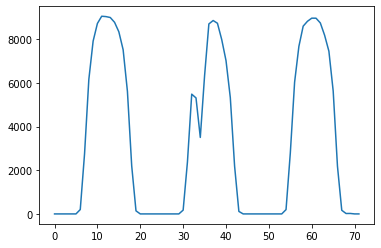

In [43]:
# Now we can plot according to unique indexes:
plt.plot(caiso_data.loc[:,'SOLAR PV']) # do this in lecture

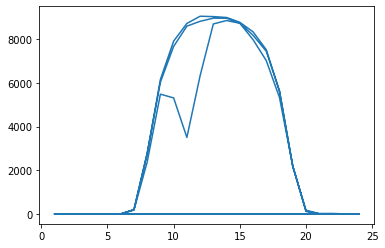

In [44]:
# alternatively we can plot by hour of day to see things overlap
plt.plot(caiso_data.loc[:,'Hour'],caiso_data.loc[:,'SOLAR PV']) # do this in lecture

## Some things we saw in this notebook
* Pandas helps us view and access 'dataframes', which are like spreadsheets of all sorts of different data.
    * We're going to learn a lot more about pandas soon
    * Some of the most-used pandas objects and methods: `.loc`, and the "index"
* It's important to write functions to get your work done -- 
    * this makes code more readable, 
    * helps for debugging 
    * makes it easier to make a worksheet do many things over and over.